# Input text analysis

#### The script counts the letters and words in the entered text, and then compares the occurrence of letters in the entered text with the letter distribution in the Polish version of Scrabble.


#### 1. Counting characters and words in the input text.

In [34]:
import re

# Count characters function
def count_characters(text):
    char_counts = {}
    for char in text:
        char = char.lower()
        if char in char_counts:
            char_counts[char] += 1
        else:
            char_counts[char] = 1

    return char_counts


# Count words function
def count_words(text):

    # Remove special characters from the text
    only_words = re.sub(r'[^A-Za-z0-9\s]', '', text)
    words = only_words.split()

    word_counts = {}
    for word in words:
        word = word.lower()
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

    return word_counts


# Get input text
input_text = input('Enter your text: ')

# Variables for char counts and word counts
char_counts = count_characters(input_text)
word_counts = count_words(input_text)

# Print character and word counts
print('Character counts:')
for char, count in sorted(char_counts.items()):
    print(f"'{char}': {count}")

print('\nWord counts:')
for word, count in sorted(word_counts.items()):
    print(f"'{word}': {count}")

Enter your text:  Rock psychodeliczny silnie związany był zwłaszcza z ruchem hippisowskim, stanowiąc główny środek artystycznego wyrazu ideologii „Dzieci kwiatów”. Nazwa pochodzi zatem od tzw. psychodelików, substancji psychoaktywnych, które zbuntowana młodzież lat 60. zażywała w celu osiągnięcia odmiennych stanów świadomości. Rock psychodeliczny przyczynił się jednocześnie do powstania takich gatunków muzyki rockowej jak hard rock, rock progresywny czy nawet heavy metal. Za prekursora rocka psychodelicznego uważa się amerykański zespół The Charlatans, utworzony w 1964 w San Francisco. Działalność zespołu była bezpośrednią inspiracją dla utworzenia grupy Grateful Dead (wcześniej The Warlocks). Określenia „muzyka psychedeliczna” po raz pierwszy użyła grupa 13th Floor Elevators w wywiadzie udzielonym w 1966 i na swojej pierwszej płycie The Psychedelic Sounds of the 13th Floor Elevators (1966).  Pierwotnie rock psychodeliczny wywodził się z tradycyjnego rockandrolla oraz bluesa, odchodząc

#### 2. Polish version of "Scrabble" - letter distribution

In [35]:
scrabble = {
'a': 9,
'b': 2,
'c': 3,
'd': 3,
'e': 7,
'f': 1,
'g': 2,
'h': 2,
'i': 8,
'j': 2,
'k': 3,
'l': 3,
'm': 3,
'n': 5,
'o': 6,
'p': 3,
'r': 4,
's': 4,
't': 3,
'u': 2,
'v': 0,
'w': 4,
'x': 0,
'y': 4,
'z': 5,
'ó': 1,
'ą': 1,
'ć': 1,
'ę': 1,
'ł': 1,
'ń': 1,
'ś': 1,
'ź': 1,
'ż': 1
}

#### 3. Dictionaries preparation

In [36]:
# Convert to percentages function
def convert_to_percentages(dictionary):
    summary = sum(dictionary.values())
    # Avoid division by zero
    if summary == 0:
        return {key: 0 for key in dictionary}
    return {key: (value / summary) * 100 for key, value in dictionary.items()}

# Convert to percentages
scrabble = convert_to_percentages(scrabble)
char_counts = convert_to_percentages(char_counts)


# Filter function 
def filter(dict1, dict2):
    return {key: dict1[key] for key in dict1 if key in dict2}

# Filter char_counts to include only keys that exist in scrabble
char_counts = filter(char_counts, scrabble)

#### 4. Comparison: Input text letter distribution vs Scrabble letter distribution

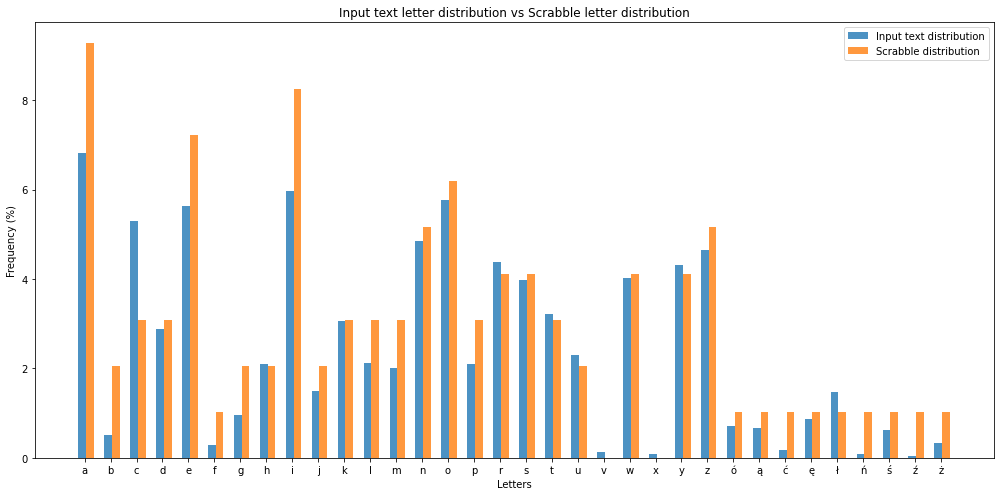

In [43]:
# Create lists for comparison
union_keys = set(char_counts.keys()).union(scrabble.keys())
union_keys = sorted(union_keys)
char_values = [char_counts.get(key, 0) for key in union_keys]
scrabble_values = [scrabble.get(key, 0) for key in union_keys]

# Create bar chart
x = range(len(union_keys))
plt.figure(figsize=(14, 7))
plt.bar(x, char_values, width=0.3, label='Input text distribution', alpha=0.8)
plt.bar([p + 0.3 for p in x], scrabble_values, width=0.3, label='Scrabble distribution', alpha=0.8)
plt.ylabel("Frequency (%)")
plt.xlabel("Letters")
plt.title('Input text letter distribution vs Scrabble letter distribution')
plt.xticks([p + 0.1 for p in x], union_keys)
plt.legend()
plt.tight_layout()